In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather =requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | fairfield
Processing Record 3 of Set 1 | oblivskaya
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 10 of Set 1 | solnechnyy
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | muisne
Processing Record 15 of Set 1 | bundaberg
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | wuxi
Processing Record 18 of Set 1 | dryden
Processing Record 19 of Set 1 | gat
Processing Record 20 of Set 1 | ishigaki
Processing Record 21 of Set 1 | san carlos de b

In [18]:
len(city_data)

575

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fairfield,41.2668,-73.3162,39.79,52,0,11.50,US,2022-12-10 17:45:20
1,Oblivskaya,48.5362,42.5014,34.77,92,100,16.44,RU,2022-12-10 17:49:39
2,Albany,42.6001,-73.9662,32.58,63,0,3.56,US,2022-12-10 17:46:01
3,San Cristobal,7.7669,-72.2250,75.38,47,60,2.71,VE,2022-12-10 17:49:39
4,Pacific Grove,36.6177,-121.9166,59.11,90,100,28.99,US,2022-12-10 17:49:40
5,Clyde River,70.4692,-68.5914,-18.17,83,0,5.75,CA,2022-12-10 17:49:40
6,Mount Gambier,-37.8333,140.7667,55.00,78,35,1.92,AU,2022-12-10 17:49:41
7,Solnechnyy,50.7214,136.6319,-1.23,95,79,3.60,RU,2022-12-10 17:49:41
8,Port-Gentil,-0.7193,8.7815,78.76,83,75,5.75,GA,2022-12-10 17:49:41
9,East London,-33.0153,27.9116,72.54,94,100,6.91,ZA,2022-12-10 17:49:42


In [20]:
# Create a new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fairfield,US,2022-12-10 17:45:20,41.2668,-73.3162,39.79,52,0,11.50
1,Oblivskaya,RU,2022-12-10 17:49:39,48.5362,42.5014,34.77,92,100,16.44
2,Albany,US,2022-12-10 17:46:01,42.6001,-73.9662,32.58,63,0,3.56
3,San Cristobal,VE,2022-12-10 17:49:39,7.7669,-72.2250,75.38,47,60,2.71
4,Pacific Grove,US,2022-12-10 17:49:40,36.6177,-121.9166,59.11,90,100,28.99
5,Clyde River,CA,2022-12-10 17:49:40,70.4692,-68.5914,-18.17,83,0,5.75
6,Mount Gambier,AU,2022-12-10 17:49:41,-37.8333,140.7667,55.00,78,35,1.92
7,Solnechnyy,RU,2022-12-10 17:49:41,50.7214,136.6319,-1.23,95,79,3.60
8,Port-Gentil,GA,2022-12-10 17:49:41,-0.7193,8.7815,78.76,83,75,5.75
9,East London,ZA,2022-12-10 17:49:42,-33.0153,27.9116,72.54,94,100,6.91


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities_1.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module 
import time
# Get todays date in seconds
today = time.time()

today

1670695664.3417113

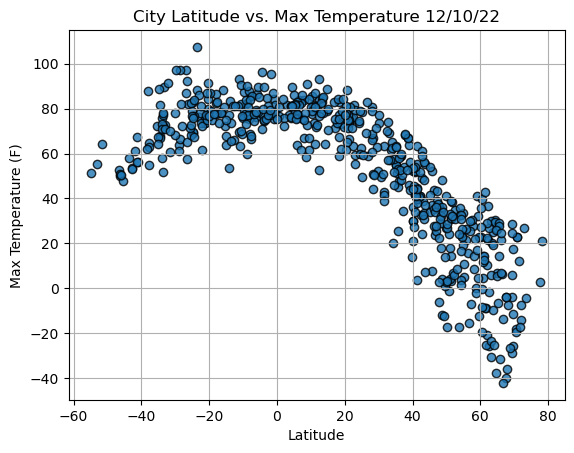

In [24]:
#Build the scatter plot fo the latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label= "Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


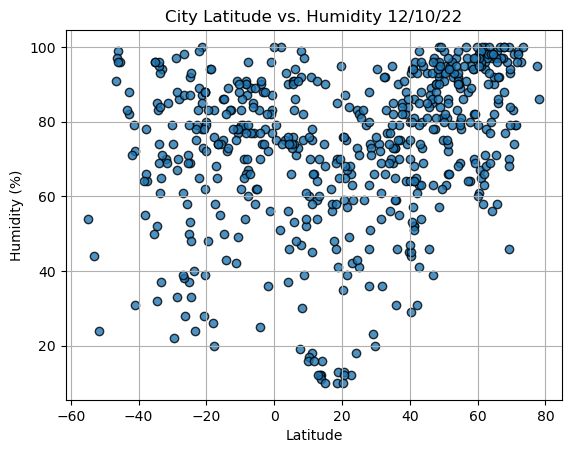

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

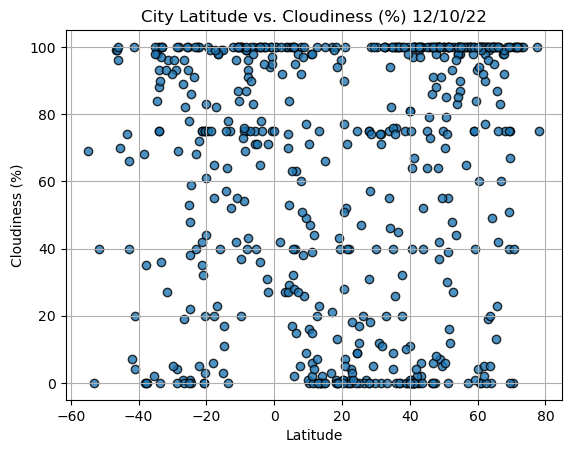

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

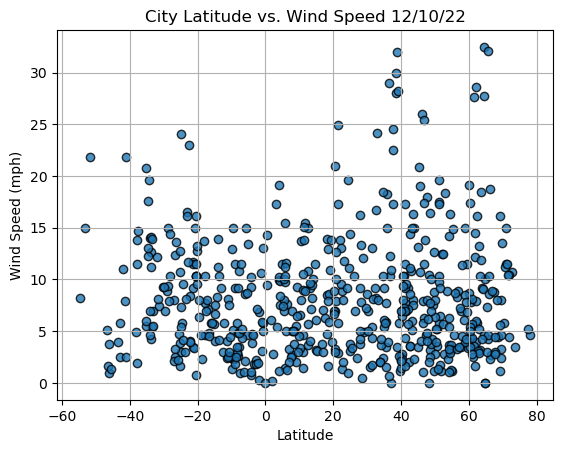

In [33]:
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()